In [1]:
import uproot
import matplotlib.pyplot as plt
file = uproot.open('/Users/albaburgosmondejar/Desktop/Input2/hhml_v2_2lSC_QMisID_Vjets_Zee.root')

file.keys()
file.classnames()
file['qmisid_cr;1']
tree = file['qmisid_cr']
tree.arrays()
branches = tree.arrays()


In [7]:
import numpy as np
df = branches
mask_low  = (df["m_l1l2"] >  71000) & (df["m_l1l2"] <  81000)
mask_high = (df["m_l1l2"] > 101000) & (df["m_l1l2"] < 111000)
mask_Z    = (df["m_l1l2"] >= 81000) & (df["m_l1l2"] <= 101000)
mask_tight = df['l0_tight'==1] & df['l1_tight'==1]
data = df[mask_tight]
len_A = np.sum(mask_low)
len_B = np.sum(mask_Z)
len_C = np.sum(mask_high)
N_sig = len_B - (len_A + len_C)/2
factor_bck = N_sig / len_B
factor_bck = 0.976

print(np.sum(N_sig))

TypeError: only integers, slices (`:`), ellipsis (`...`), np.newaxis (`None`), integer/boolean arrays (possibly with variable-length nested lists or missing values), field name (str) or names (non-tuple iterable of str) are valid indices for slicing, not

    False

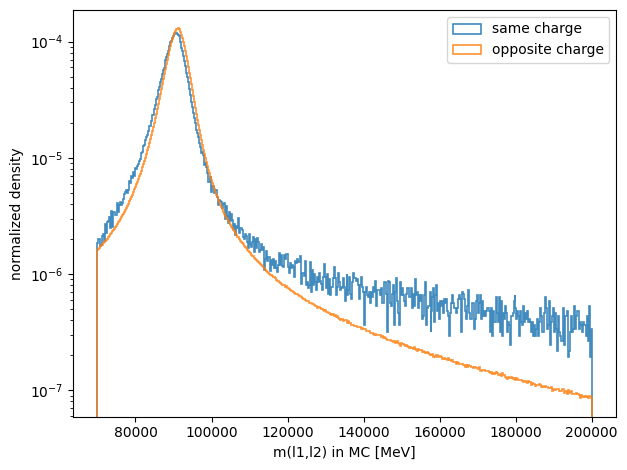

In [14]:
#Failure Mode Investigation
mask1 = branches["same_charge"] == 1
mask0 = branches["same_charge"] == 0

plt.figure()

plt.hist(
    branches["m_l1l2"][mask1],
    bins=500,
    range=(7e4,2e5),
    histtype="step",
    linewidth=1.2,
    alpha=0.85,
    density=True,
    label="same charge"
)

plt.hist(
    branches["m_l1l2"][mask0],
    bins=500,
    range=(7e4,2e5),
    histtype="step",
    linewidth=1.2,
    alpha=0.85,
    density=True,
    label="opposite charge"
)

plt.xlabel("m(l1,l2) in MC [MeV]")
plt.ylabel("normalized density")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()


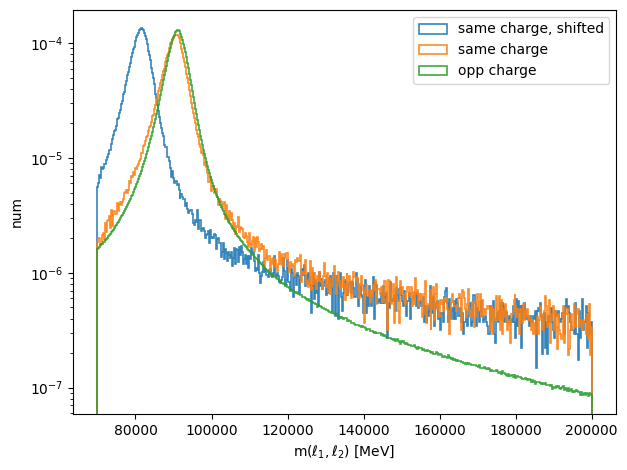

In [62]:
import numpy as np
import awkward as ak

up = ak.where(
    mask1,
    branches["m_l1l2"]*0.90,   # same charge shift ↓ Z peak
    branches["m_l1l2"]*1.00    # everything else unshifted
)

m_sc = up[mask1]

# same-sign baseline
plt.hist(
    m_sc,
    bins=500,
    range=(70_000, 200_000),
    histtype="step",
    linewidth=1.2,
    alpha=0.9,
    density=True,
    label="same charge, shifted",
)

plt.hist(
    m[mask1],
    bins=500,
    range=(70_000, 200_000),
    histtype="step",
    linewidth=1.2,
    alpha=0.9,
    density=True,
    label="same charge",
)

plt.hist(
    m[mask0],
    bins=500,
    range=(70_000, 200_000),
    histtype="step",
    linewidth=1.2,
    alpha=0.9,
    density=True,
    label="opp charge",
)


plt.xlabel("m($\ell_1,\ell_2$) [MeV]")
plt.ylabel("num")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()


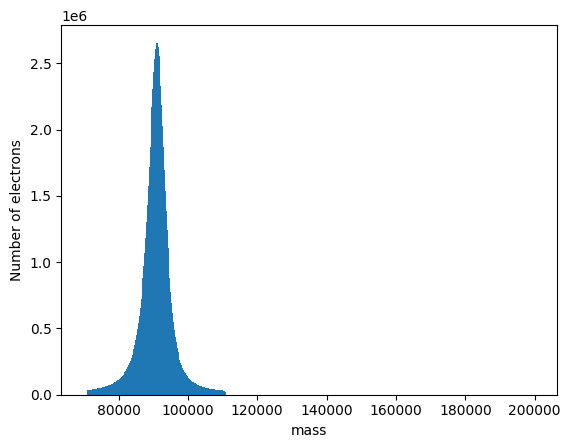

In [21]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["m_l1l2"][mask]), bins=500, range=(7*1e4,2*1e5))
plt.xlabel('mass')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

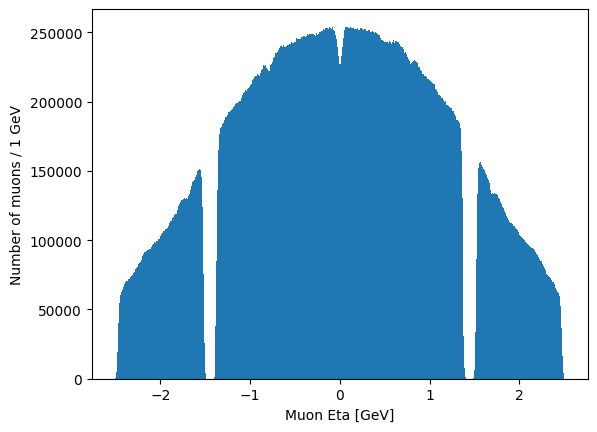

In [8]:
import awkward as ak
import matplotlib.pyplot as plt
plt.hist((branches["l1_eta"]), bins=500)
plt.xlabel('Muon Eta [GeV]')
plt.ylabel('Number of muons / 1 GeV')
plt.show()
plt.show()

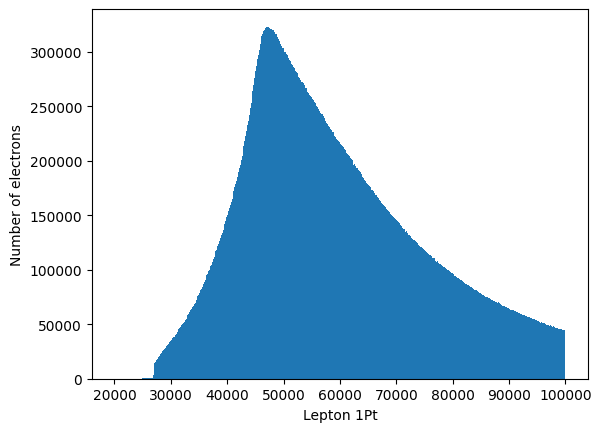

In [18]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["l1_pt"][mask]), bins=500, range=(20e3, 100e3))
plt.xlabel('Lepton 1Pt')
plt.ylabel('Number of electrons')
plt.show()
plt.show()


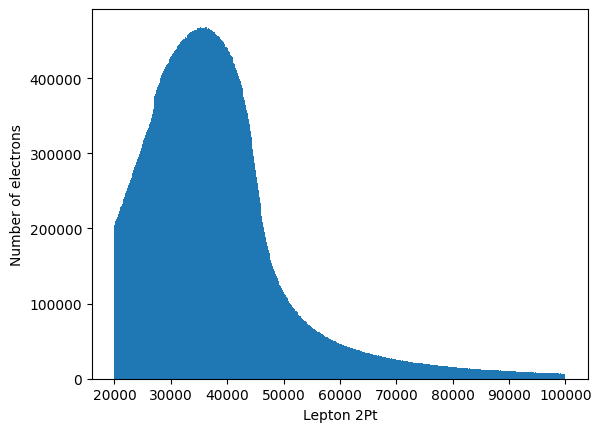

In [21]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["l2_pt"][mask]), bins=500, range=(20000, 100000))
plt.xlabel('Lepton 2Pt')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

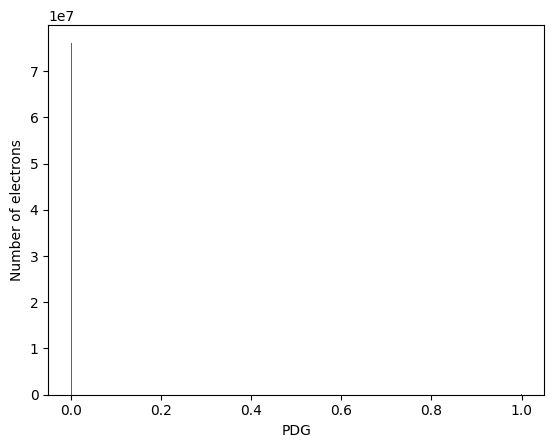

In [33]:
import awkward as ak
import matplotlib.pyplot as plt

mask = (branches["m_l1l2"] >= 71000) & (branches["m_l1l2"] <= 111000)
plt.hist((branches["same_charge"][mask]), bins=500)
plt.xlabel('PDG')
plt.ylabel('Number of electrons')
plt.show()
plt.show()

In [11]:
import numpy as np
vals, counts = np.unique(branches["l1_isQMisID"], return_counts=True)
print(vals, counts)

l1_mask = np.array(branches["l1_isQMisID"]) > 0
l2_mask = np.array(branches["l2_isQMisID"]) > 0

print("l1 QMisID count:", np.sum(l1_mask))
print("l2 QMisID count:", np.sum(l2_mask))
print("total QmisID:", np.sum(l1_mask)+np.sum(l2_mask))
print("same charge total:", np.sum(branches["same_charge"]))
print("opposite charge total:", np.sum(branches["opposite_charge"]))

N = 15   
idx = np.where(branches["same_charge"]==1)[0][:N]
for i in idx:
    print(i, branches["l1_pdg"][i], branches["l2_pdg"][i])

ch1_mask = np.array(branches["l1_pdg"]) > 0
ch2_mask = np.array(branches["l2_pdg"]) > 0

print("l1 + charge", np.sum(ch1_mask))
print("l2 + charge", np.sum(ch2_mask))

[0, 1] [82250838, 117662]
l1 QMisID count: 117662
l2 QMisID count: 34513
total QmisID: 152175
same charge total: 175431
opposite charge total: 82193069
997 -11 -11
1199 -11 -11
1418 -11 -11
2421 -11 -11
2645 -11 -11
3103 11 11
3797 11 11
4645 -11 -11
4771 11 11
5594 11 11
5871 11 11
6237 -11 -11
6802 -11 -11
7620 -11 -11
7674 11 11
l1 + charge 41355142
l2 + charge 41007453


In [10]:
import numpy as np
mask_low  = (branches["m_l1l2"] >  71000) & (branches["m_l1l2"] <  81000)
mask_high = (branches["m_l1l2"] > 101000) & (branches["m_l1l2"] < 111000)
mask_Z    = (branches["m_l1l2"] >= 81000) & (branches["m_l1l2"] <= 101000)
len_A = np.sum(mask_low)
len_B = np.sum(mask_Z)
len_C = np.sum(mask_high)
N_sig = len_B - (len_A + len_C)/2
factor_bck = N_sig / len_B
print(factor_bck)
print(factor_bck)

0.9672236962170768
0.9672236962170768
